# TASK #1: UNDERSTAND THE PROBLEM STATEMENT 


- Aim of the problem is to find the health insurance cost incured by Individuals based on thier age, gender, BMI, number of children, smoking habit and geo-location.

- Features available are:

    - sex: insurance contractor gender, female, male

    - bmi: Body mass index (ideally 18.5 to 24.9)

    - children: Number of children covered by health insurance / Number of dependents

    - smoker: smoking habits

    - region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

    - charges: Individual medical costs billed by health insurance


Data Source:https://www.kaggle.com/mirichoi0218/insurance

# TASK #2: IMPORT LIBRARIES AND DATASETS

TYPES OF AVAILABLE SAGEMAKER IMAGES 
- Data Science [datascience-1.0]: Data Science is a Conda image with the most commonly used Python packages and libraries, such as NumPy and SciKit Learn.
- Base Python [python-3.6]
- MXNet (optimized for CPU) [mxnet-1.6-cpu-py36]
- MXNet (optimized for GPU) [mxnet-1.6-gpu-py36]
- PyTorch (optimized for CPU) [pytorch-1.4-cpu-py36]
- PyTorch (optimized for GPU) [pytorch-1.4-gpu-py36]
- TensorFlow (optimized for CPU) [tensorflow-1.15-cpu-py36]
- TensorFlow (optimized for GPU) [tensorflow-1.15-gpu-py36]
- TensorFlow 2 (optimized for CPU) [tensorflow-2.1-cpu-py36]
- TensorFlow 2 (optimized for GPU) [tensorflow-2.1-gpu-py36]

In [2]:
!pip install seaborn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


MINI CHALLENGE
- Read the CSV file "insurance.csv" using pandas 
- Visualize the first and last 5 rows 

In [3]:
# read the csv file 
insurance_df = pd.read_csv('insurance.csv')

In [4]:
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS:

In [5]:
# check if there are any Null values
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# Check the dataframe info

insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# Grouping by region to see any relationship between region and charges
# Seems like south east region has the highest charges and body mass index
#df_region = insurance_df.groupby('region').mean()
#df_region
df_region = insurance_df.groupby('region').mean(numeric_only=True)
print(df_region)


                 age        bmi  children       charges
region                                                 
northeast  39.268519  29.173503  1.046296  13406.384516
northwest  39.196923  29.199785  1.147692  12417.575374
southeast  38.939560  33.355989  1.049451  14735.411438
southwest  39.455385  30.596615  1.141538  12346.937377


MINI CHALLENGE
- Group data by 'age' and examine the relationship between 'age' and 'charges'


In [8]:
df_age = insurance_df.groupby(by='age').mean(numeric_only=True)
df_age

,bmi,children,charges
age,,,
18,31.326159,0.449275,7086.217556
19,28.596912,0.426471,9747.909335
20,30.632759,0.862069,10159.697736
21,28.185714,0.785714,4730.464330
22,31.087679,0.714286,10012.932802
23,31.454464,1.000000,12419.820040
24,29.142679,0.464286,10648.015962
25,29.693929,1.285714,9838.365311
26,29.428929,1.071429,6133.825309


In [9]:
# Check unique values in the 'sex' column
insurance_df['sex'].unique()

array(['female', 'male'], dtype=object)

In [10]:
# convert categorical variable to numerical

insurance_df['sex'] = insurance_df['sex'].apply(lambda x: 0 if x == 'female' else 1)

In [16]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [11]:
# Check the unique values in the 'smoker' column
insurance_df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [12]:
# Convert categorical variable to numerical 

insurance_df['smoker'] = insurance_df['smoker'].apply(lambda x: 0 if x == 'no' else 1)

In [13]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [20]:
# Check unique values in 'region' column
insurance_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [14]:
region_dummies = pd.get_dummies(insurance_df['region'], drop_first = True)


In [18]:
region_dummies

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [15]:
insurance_df = pd.concat([insurance_df, region_dummies], axis = 1)

In [16]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,False,False,True
1,18,1,33.770,1,0,southeast,1725.55230,False,True,False
2,28,1,33.000,3,0,southeast,4449.46200,False,True,False
3,33,1,22.705,0,0,northwest,21984.47061,True,False,False
4,32,1,28.880,0,0,northwest,3866.85520,True,False,False


In [17]:
# Let's drop the original 'region' column 
insurance_df.drop(['region'], axis = 1, inplace = True)


In [18]:
insurance_df.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False


MINI CHALLENGE
- Calculate the mean and standard deviation of the age, charges and bmi

In [19]:
insurance_df[['age','bmi','charges']].describe()

,age,bmi,charges
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265
std,14.049960,6.098187,12110.011237
min,18.000000,15.960000,1121.873900
25%,27.000000,26.296250,4740.287150
50%,39.000000,30.400000,9382.033000
75%,51.000000,34.693750,16639.912515
max,64.000000,53.130000,63770.428010


# TASK #4: VISUALIZE DATASET

In [20]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   int64  
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   int64  
 5   charges    1338 non-null   float64
 6   northwest  1338 non-null   bool   
 7   southeast  1338 non-null   bool   
 8   southwest  1338 non-null   bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 66.8 KB


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'children'}>],
       [<Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

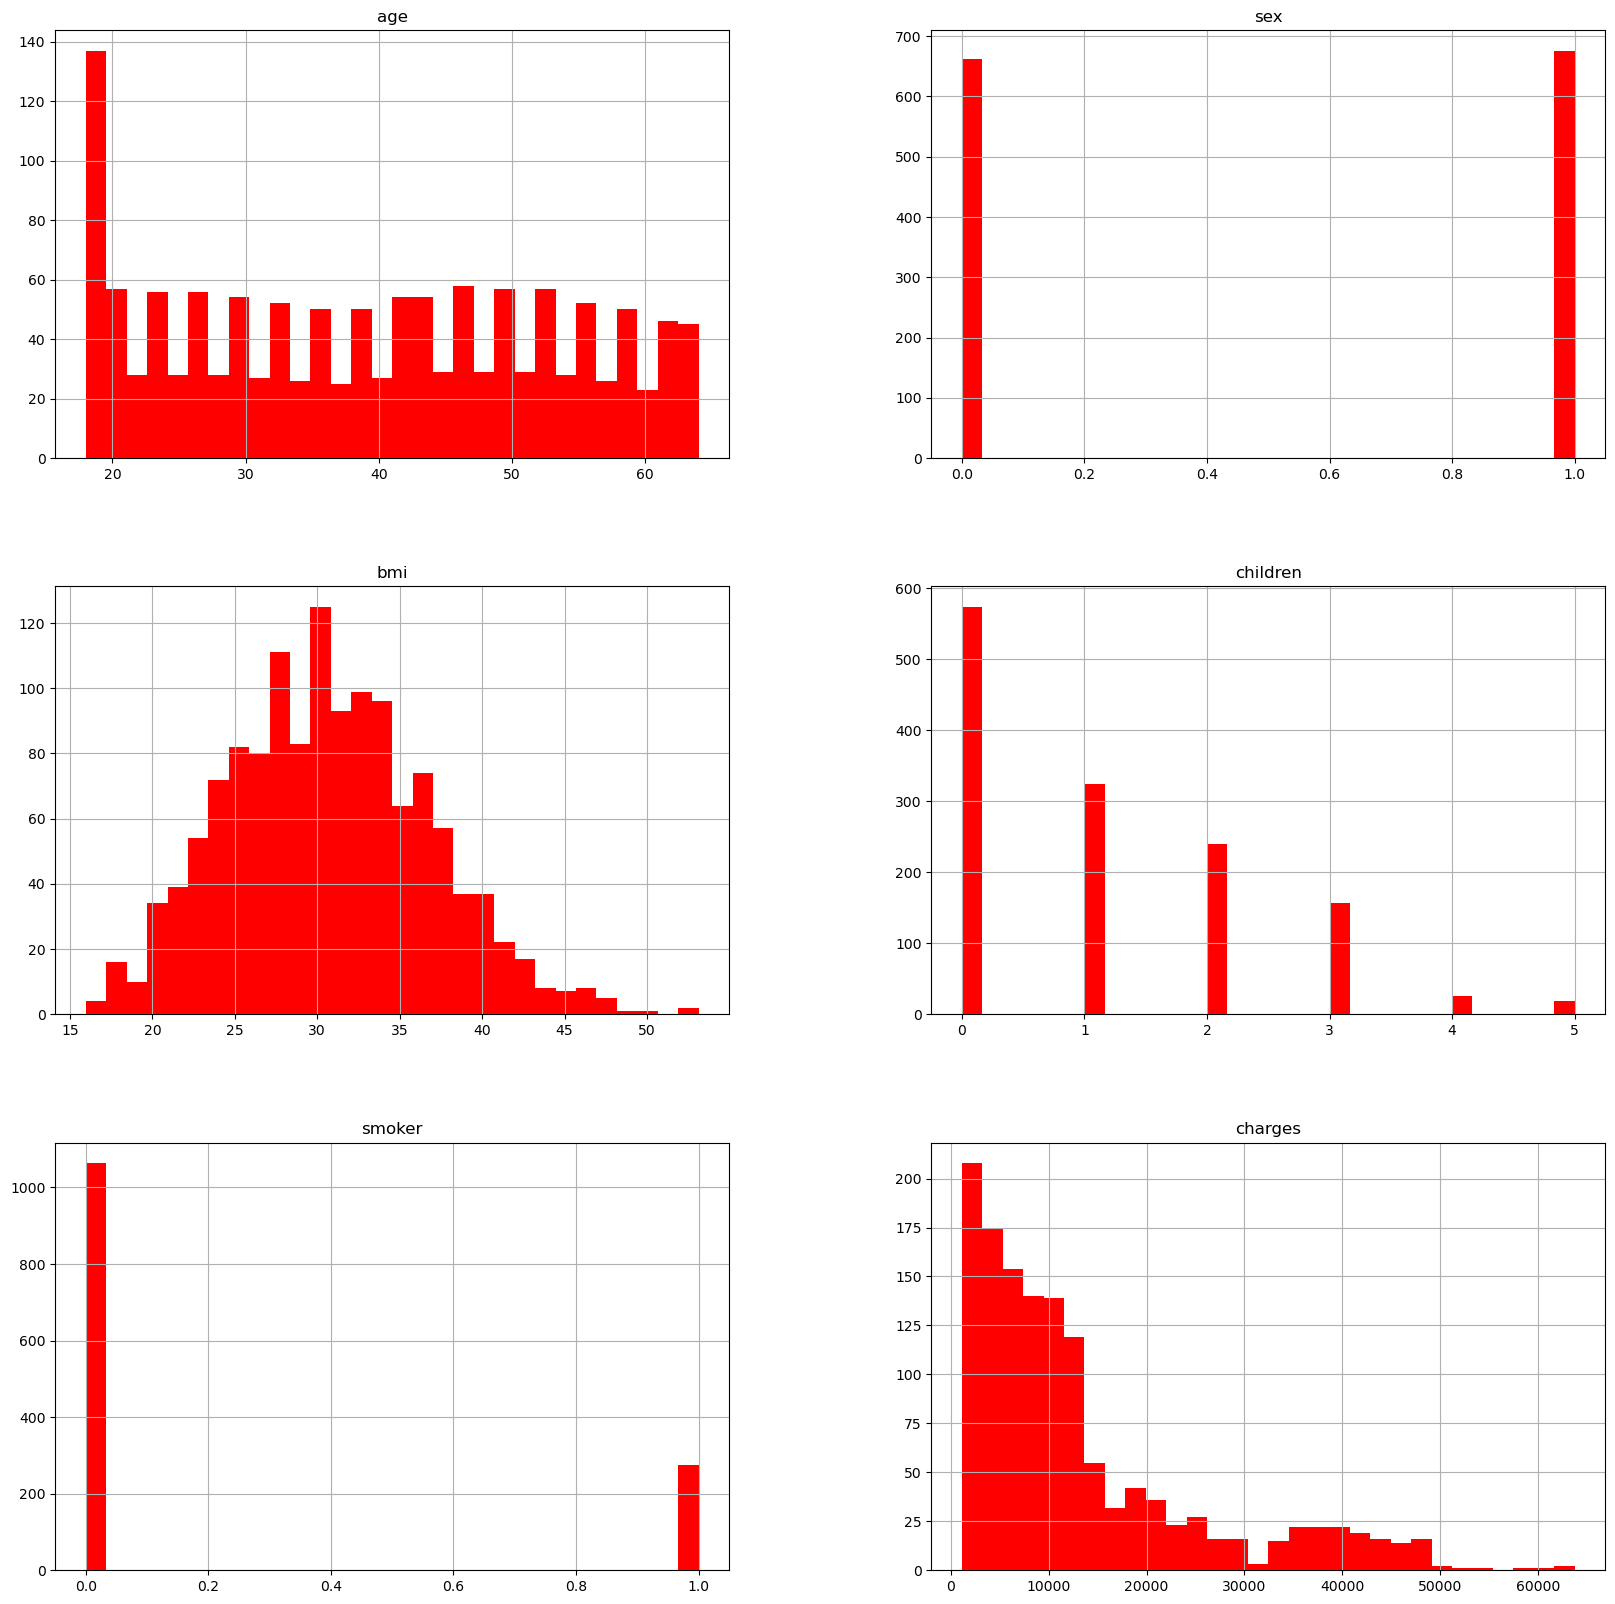

In [21]:
insurance_df.select_dtypes(['int64','float64']).hist(bins = 30, figsize = (20,20), color = 'r')


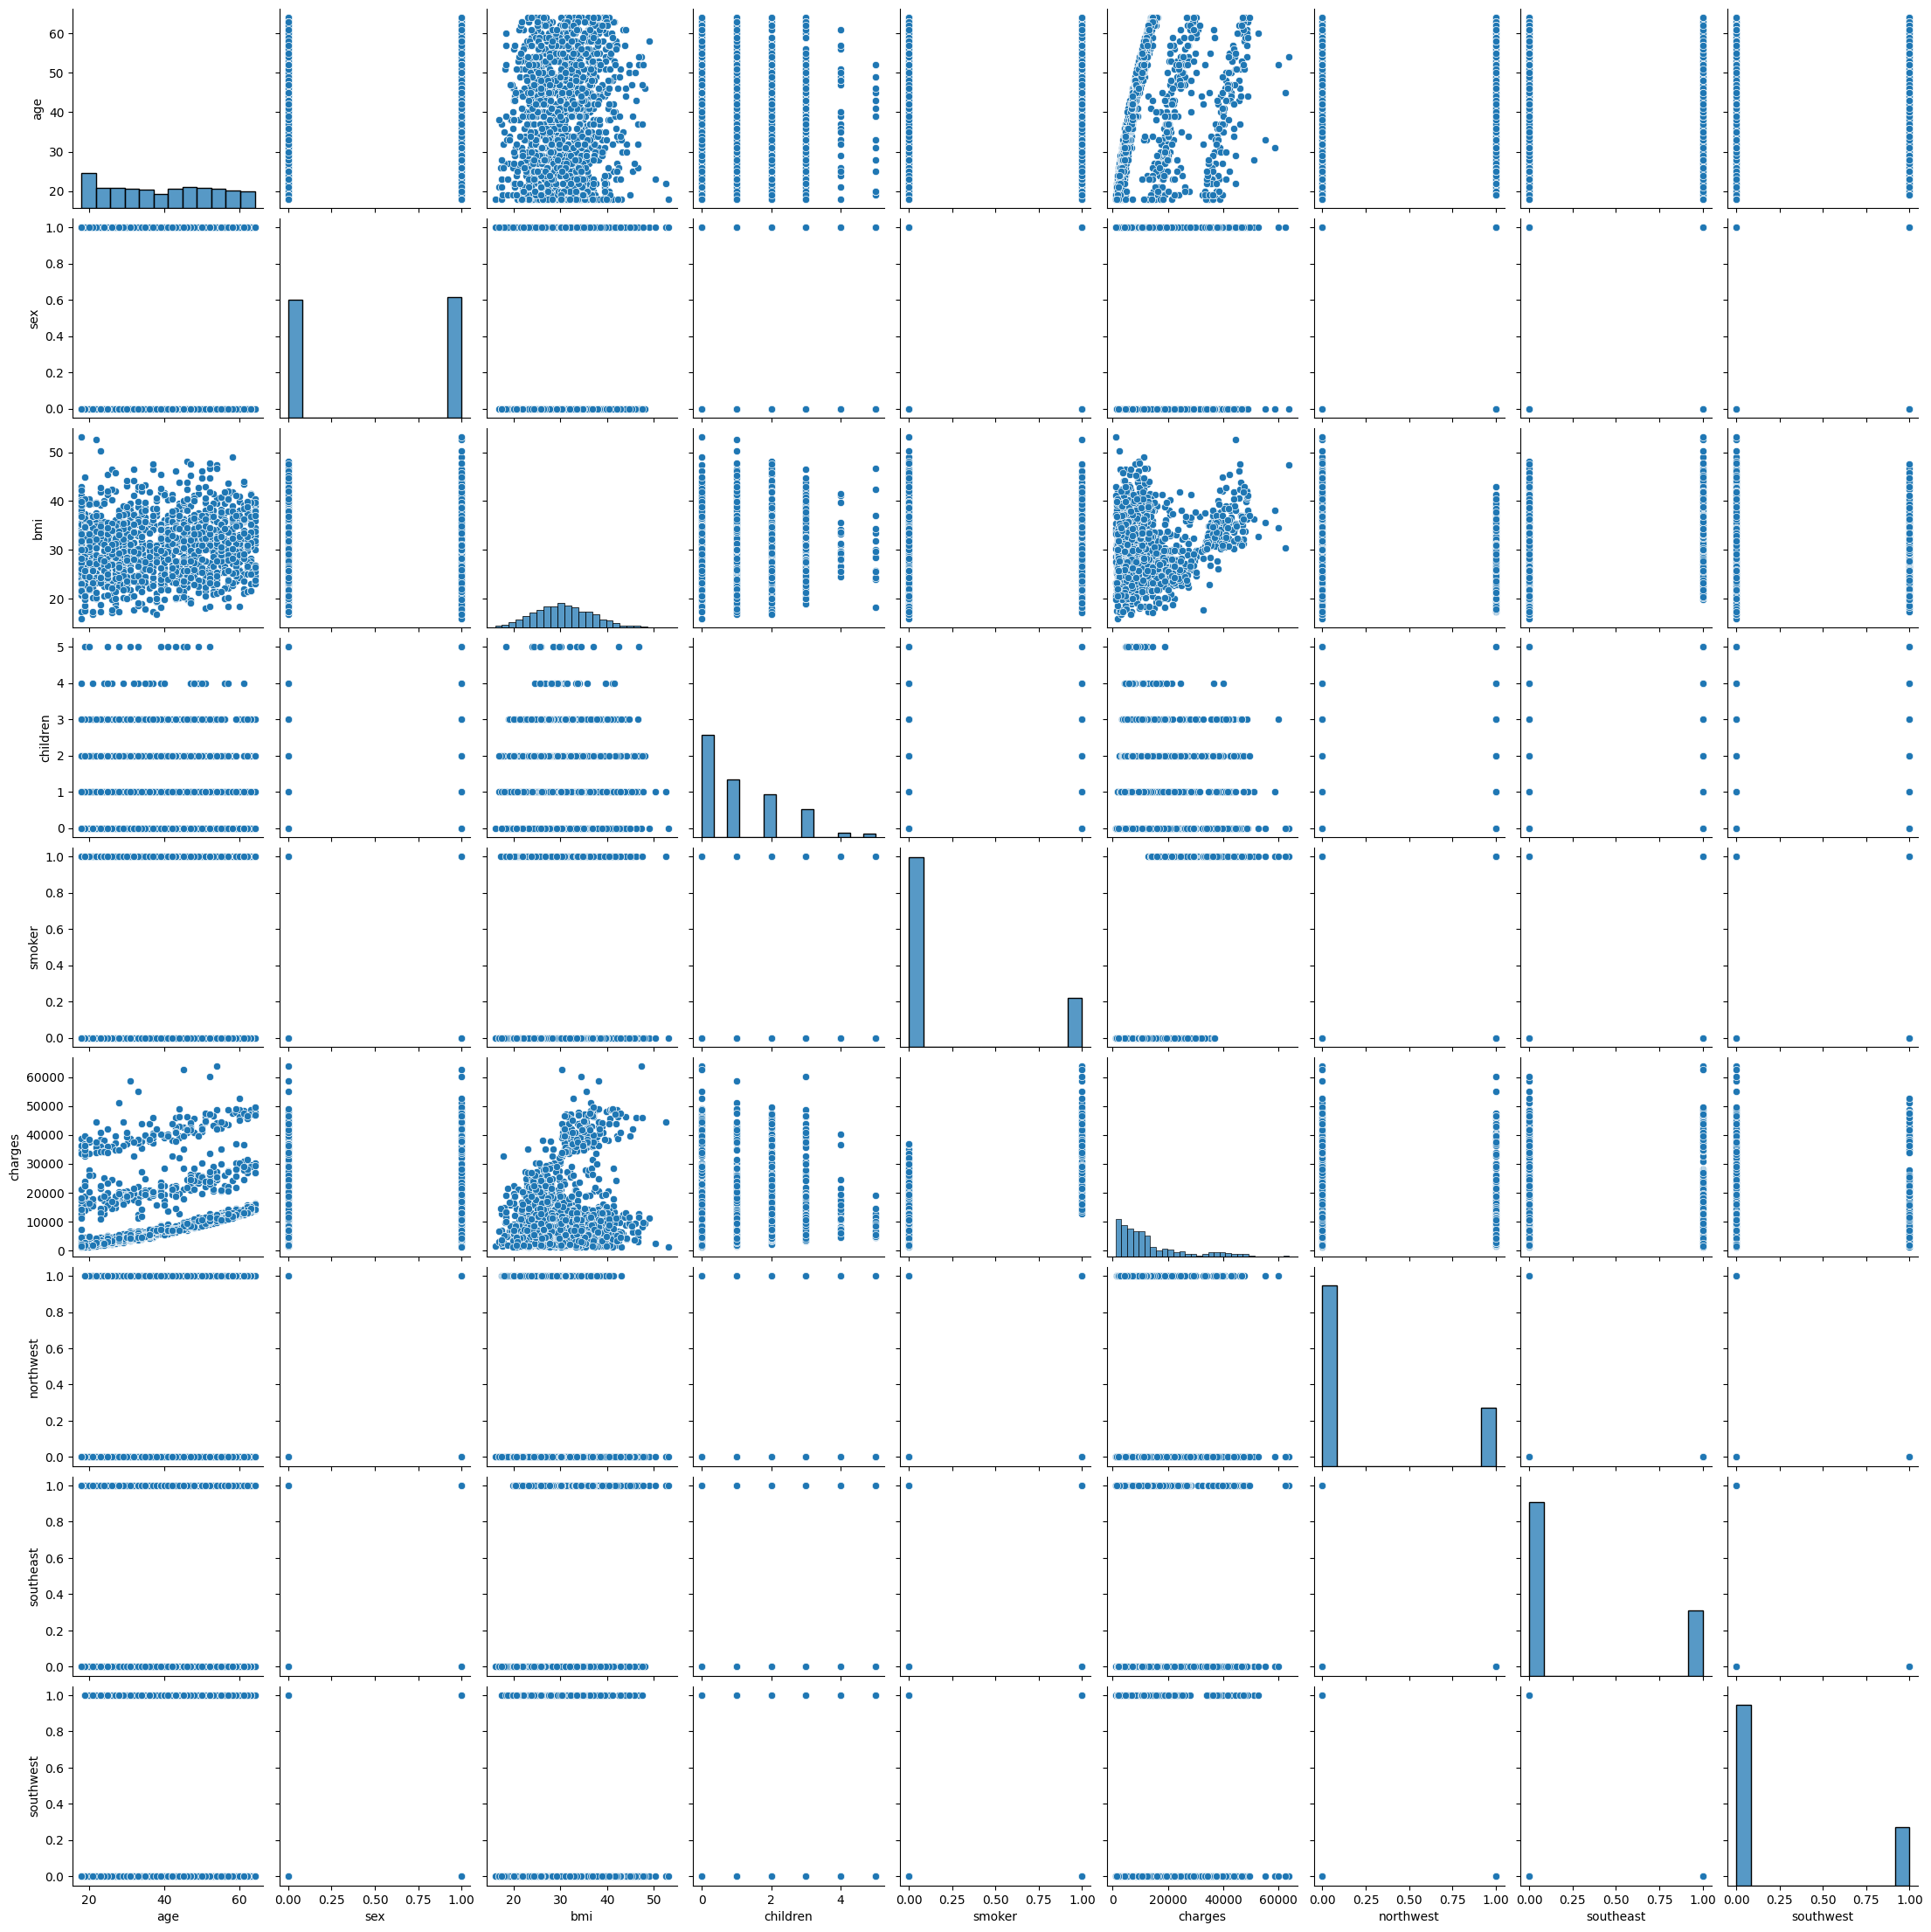

In [34]:
# plot pairplot

sns.pairplot(insurance_df)

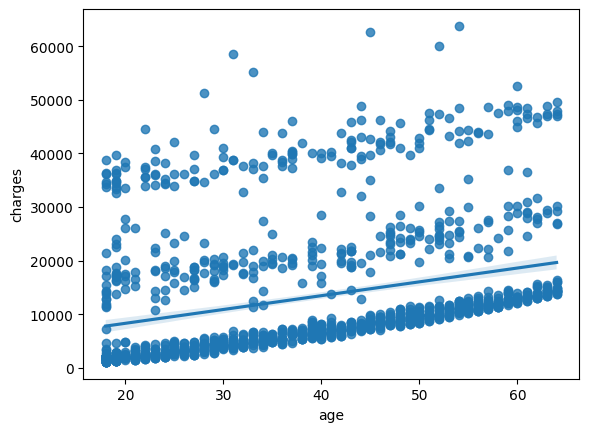

In [35]:
sns.regplot(x = 'age', y = 'charges', data = insurance_df)
plt.show()
  

MINI CHALLENGE
- Obtain the regplot between bmi and charges


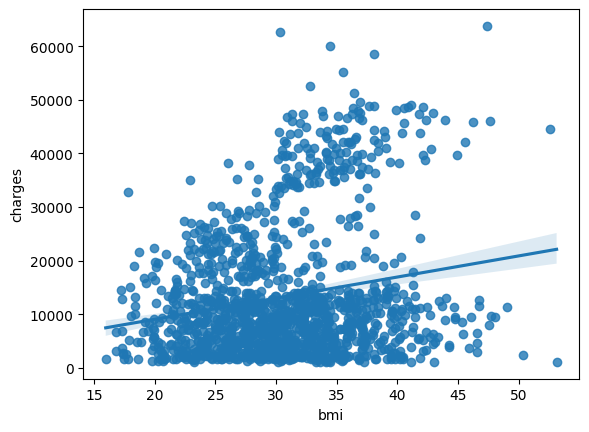

In [37]:
sns.regplot(x = 'bmi', y = 'charges', data = insurance_df)
plt.show()
  

MINI CHALLENGE
 - Calculate and plot the correlation matrix
 - Which feature has the most positive correlation with charges?

In [39]:
insurance_df.corr()['charges']

age          0.299008
sex          0.057292
bmi          0.198341
children     0.067998
smoker       0.787251
charges      1.000000
northwest   -0.039905
southeast    0.073982
southwest   -0.043210
Name: charges, dtype: float64

<Axes: >

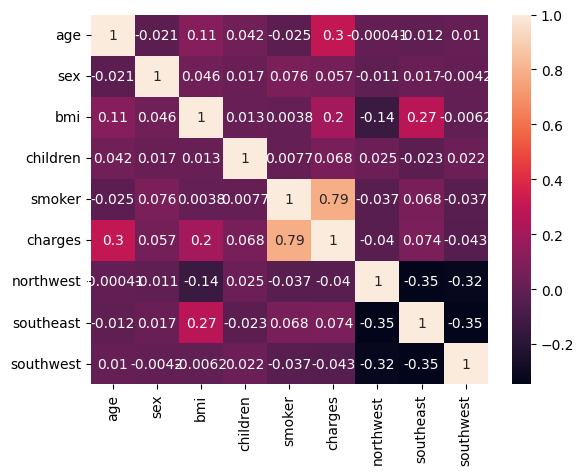

In [40]:
sns.heatmap(insurance_df.corr(), annot = True)

In [26]:

# smoker and age have positive correlations with charges

# TASK #5: CREATE TRAINING AND TESTING DATASET

In [41]:
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northwest',
       'southeast', 'southwest'],
      dtype='object')

In [22]:
X = insurance_df.drop(columns =['charges'])
y = insurance_df['charges']


In [23]:
X

,age,sex,bmi,children,smoker,northwest,southeast,southwest
0,19,0,27.900,0,1,False,False,True
1,18,1,33.770,1,0,False,True,False
2,28,1,33.000,3,0,False,True,False
3,33,1,22.705,0,0,True,False,False
4,32,1,28.880,0,0,True,False,False
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,True,False,False
1334,18,0,31.920,0,0,False,False,False
1335,18,0,36.850,0,0,False,True,False
1336,21,0,25.800,0,0,False,False,True


In [24]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [45]:
X.shape

(1338, 8)

In [46]:
y.shape

(1338,)

In [27]:
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [28]:
y = y.reshape(-1,1)

In [29]:
# Only take the numerical variables and scale them
X 

array([[19.  ,  0.  , 27.9 , ...,  0.  ,  0.  ,  1.  ],
       [18.  ,  1.  , 33.77, ...,  0.  ,  1.  ,  0.  ],
       [28.  ,  1.  , 33.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [18.  ,  0.  , 36.85, ...,  0.  ,  1.  ,  0.  ],
       [21.  ,  0.  , 25.8 , ...,  0.  ,  0.  ,  1.  ],
       [61.  ,  0.  , 29.07, ...,  1.  ,  0.  ,  0.  ]], dtype=float32)

In [30]:
y

array([[16884.924 ],
       [ 1725.5522],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.36  ]], dtype=float32)

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [53]:
#scaling the data before feeding the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)


MINI CHALLENGE
- Split the data into 20% Testing and 80% Training
- Double check that the split was successful by getting the shape of both the training and testing datasets

# TASK #6: TRAIN AND TEST A LINEAR REGRESSION MODEL IN SK-LEARN (NOTE THAT SAGEMAKER BUILT-IN ALGORITHMS ARE NOT USED HERE)

In [52]:
# using linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

regresssion_model_sklearn = LinearRegression()
regresssion_model_sklearn.fit(X_train, y_train)


LinearRegression()

In [54]:
regresssion_model_sklearn_accuracy = regresssion_model_sklearn.score(X_test, y_test)
regresssion_model_sklearn_accuracy

0.7835929989814758

In [54]:
y_predict = regresssion_model_sklearn.predict(X_test)

In [55]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)


In [56]:
k = X_test.shape[1]
n = len(X_test)
n

268

In [57]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)


In [58]:
print('RMSE =',RMSE, '\nMSE =',MSE)

RMSE = 0.482 
MSE = 0.23277262


MINI CHALLENGE
- calculate the mean absolute error, R2 and adjusted R2

In [59]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r2 = r2_score(y_test_orig, y_predict_orig)
mae = mean_absolute_error(y_test_orig, y_predict_orig)


In [60]:
print('R2 =',r2, '\nMAE =',mae)

R2 = 0.7835929989814758 
MAE = 0.34802997


# TASK #7: TRAIN A LINEAR LEARNER MODEL USING SAGEMAKER

In [33]:
# Boto3 is the Amazon Web Services (AWS) Software Development Kit (SDK) for Python
# Boto3 allows Python developer to write software that makes use of services like Amazon S3 and Amazon EC2

import sagemaker
import boto3
from sagemaker import Session

# Let's create a Sagemaker session
sagemaker_session = sagemaker.Session()
bucket = Session().default_bucket() 
prefix = 'linear_learner' # prefix is the subfolder within the bucket.

# Let's get the execution role for the notebook instance. 
# This is the IAM role that you created when you created your notebook instance. You pass the role to the training job.
# Note that AWS Identity and Access Management (IAM) role that Amazon SageMaker can assume to perform tasks on your behalf (for example, reading training results, called model artifacts, from the S3 bucket and writing training results to Amazon S3). 
role = sagemaker.get_execution_role()
print(role)

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml
arn:aws:iam::975050292344:role/service-role/AmazonSageMaker-ExecutionRole-20241208T044886


In [34]:
X_train.shape

(1070, 8)

In [35]:
y_train.shape

(1070, 1)

In [36]:
# y_train = y_train[:,0]

In [37]:
y_train.shape

(1070, 1)

In [38]:
import io # The io module allows for dealing with various types of I/O (text I/O, binary I/O and raw I/O). 
import numpy as np
import sagemaker.amazon.common as smac # sagemaker common libary

# Code below converts the data in numpy array format to RecordIO format
# This is the format required by Sagemaker Linear Learner 

buf = io.BytesIO() # create an in-memory byte array (buf is a buffer I will be writing to)
smac.write_numpy_to_dense_tensor(buf, X_train, y_train.reshape(-1))
buf.seek(0) 
# When you write to in-memory byte arrays, it increments 1 every time you write to it
# Let's reset that back to zero 


0

In [39]:
import os

# Code to upload RecordIO data to S3
 
# Key refers to the name of the file    
key = 'linear-train-data'

# The following code uploads the data in record-io format to S3 bucket to be accessed later for training
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(buf)

# Let's print out the training data location in s3
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_train_data))

uploaded training data location: s3://sagemaker-ap-south-1-975050292344/linear_learner/train/linear-train-data


In [40]:
# create an output placeholder in S3 bucket to store the linear learner output

output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('Training artifacts will be uploaded to: {}'.format(output_location))

Training artifacts will be uploaded to: s3://sagemaker-ap-south-1-975050292344/linear_learner/output


In [41]:
# This code is used to get the training container of sagemaker built-in algorithms
# all we have to do is to specify the name of the algorithm, that we want to use

# Let's obtain a reference to the linearLearner container image
# Note that all regression models are named estimators
# You don't have to specify (hardcode) the region, get_image_uri will get the current region name using boto3.Session


from sagemaker.amazon.amazon_estimator import get_image_uri

container = get_image_uri(boto3.Session().region_name, 'linear-learner')

The method get_image_uri has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [42]:
# We have pass in the container, the type of instance that we would like to use for training 
# output path and sagemaker session into the Estimator. 
# We can also specify how many instances we would like to use for training

linear = sagemaker.estimator.Estimator(container,
                                       role, 
                                       train_instance_count = 1, 
                                       train_instance_type = 'ml.c4.xlarge',
                                       output_path = output_location,
                                       sagemaker_session = sagemaker_session,
                                       train_use_spot_instances = True,
                                       train_max_run = 300,
                                       train_max_wait = 600)


# We can tune parameters like the number of features that we are passing in, type of predictor like 'regressor' or 'classifier', mini batch size, epochs
# Train 32 different versions of the model and will get the best out of them (built-in parameters optimization!)

linear.set_hyperparameters(feature_dim = 8,
                           predictor_type = 'regressor',
                           mini_batch_size = 100,
                           epochs = 100,
                           num_models = 32,
                           loss = 'absolute_loss')

# Now we are ready to pass in the training data from S3 to train the linear learner model

linear.fit({'train': s3_train_data})

# Let's see the progress using cloudwatch logs

train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_max_run has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_use_spot_instances has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_max_wait has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
INFO:sagemaker:Creating training-job with name: linear-learner-2024-12-08-18-18-23-365


2024-12-08 18:18:24 Starting - Starting the training job...
2024-12-08 18:18:38 Starting - Preparing the instances for training...
2024-12-08 18:19:03 Downloading - Downloading input data...
2024-12-08 18:19:34 Downloading - Downloading the training image............
2024-12-08 18:21:56 Training - Training image download completed. Training in progress.
2024-12-08 18:21:56 Uploading - Uploading generated training modelDocker entrypoint called with argument(s): train
Running default environment configuration script
[12/08/2024 18:21:42 INFO 139823271049024] Reading default configuration from /opt/amazon/lib/python3.8/site-packages/algorithm/resources/default-input.json: {'mini_batch_size': '1000', 'epochs': '15', 'feature_dim': 'auto', 'use_bias': 'true', 'binary_classifier_model_selection_criteria': 'accuracy', 'f_beta': '1.0', 'target_recall': '0.8', 'target_precision': '0.8', 'num_models': 'auto', 'num_calibration_samples': '10000000', 'init_method': 'uniform', 'init_scale': '0.07', 

MINI CHALLENGE
 - retrain the linear learner model using more epochs, more number of models. 
 - Experiment with a different loss function and report any improvement or degradation in results.

# TASK #8: DEPLOY AND TEST THE TRAINED LINEAR LEARNER MODEL 

In [43]:
# Deploying the model to perform inference 

linear_regressor = linear.deploy(initial_instance_count = 1,
                                          instance_type = 'ml.m4.xlarge')

INFO:sagemaker:Creating model with name: linear-learner-2024-12-08-18-34-28-861
INFO:sagemaker:Creating endpoint-config with name linear-learner-2024-12-08-18-34-28-861
INFO:sagemaker:Creating endpoint with name linear-learner-2024-12-08-18-34-28-861


--------!

In [45]:


# Content type overrides the data that will be passed to the deployed model, since the deployed model expects data in text/csv format.

# Serializer accepts a single argument, the input data, and returns a sequence of bytes in the specified content type

# Deserializer accepts two arguments, the result data and the response content type, and return a sequence of bytes in the specified content type.

# Reference: https://sagemaker.readthedocs.io/en/stable/predictors.html


#linear_regressor.deserializer = json_deserializer
from sagemaker.serializers import CSVSerializer
from sagemaker.deserializers import JSONDeserializer

# Example of configuring the linear_regressor
linear_regressor.serializer = CSVSerializer()  # Serializes data to CSV format
linear_regressor.deserializer = JSONDeserializer()  # Deserializes JSON responses


In [46]:
# making prediction on the test data

result = linear_regressor.predict(X_test)

In [47]:
result # results are in Json format

{'predictions': [{'score': -0.3947466015815735},
  {'score': -0.6545196771621704},
  {'score': 2.3229310512542725},
  {'score': -0.42945200204849243},
  {'score': 1.3633484840393066},
  {'score': -0.5180152058601379},
  {'score': -1.112980604171753},
  {'score': 0.03642118722200394},
  {'score': -0.9007824659347534},
  {'score': -0.3309958577156067},
  {'score': 1.6265026330947876},
  {'score': -0.5096449851989746},
  {'score': -0.7669842839241028},
  {'score': 2.1663198471069336},
  {'score': 2.3962628841400146},
  {'score': 2.1298465728759766},
  {'score': -0.15974587202072144},
  {'score': 2.098792552947998},
  {'score': -0.4064822793006897},
  {'score': 1.8570022583007812},
  {'score': -0.8365532159805298},
  {'score': -0.40815243124961853},
  {'score': -1.0079283714294434},
  {'score': -0.7900637984275818},
  {'score': -0.29928848147392273},
  {'score': -0.1572418510913849},
  {'score': -0.0316624790430069},
  {'score': -0.7848987579345703},
  {'score': -0.33493945002555847},
  {'

In [48]:
# Since the result is in json format, we access the scores by iterating through the scores in the predictions

predictions = np.array([r['score'] for r in result['predictions']])

In [49]:
predictions

array([-3.94746602e-01, -6.54519677e-01,  2.32293105e+00, -4.29452002e-01,
        1.36334848e+00, -5.18015206e-01, -1.11298060e+00,  3.64211872e-02,
       -9.00782466e-01, -3.30995858e-01,  1.62650263e+00, -5.09644985e-01,
       -7.66984284e-01,  2.16631985e+00,  2.39626288e+00,  2.12984657e+00,
       -1.59745872e-01,  2.09879255e+00, -4.06482279e-01,  1.85700226e+00,
       -8.36553216e-01, -4.08152431e-01, -1.00792837e+00, -7.90063798e-01,
       -2.99288481e-01, -1.57241851e-01, -3.16624790e-02, -7.84898758e-01,
       -3.34939450e-01, -1.04250884e+00, -4.51300263e-01, -1.69042349e-01,
       -9.09027517e-01, -8.31512690e-01, -8.35221052e-01, -2.95454204e-01,
       -9.69451666e-01, -4.43430126e-01,  2.04857850e+00,  1.82355392e+00,
       -9.03080463e-01, -9.44698453e-01, -9.10999775e-02, -2.09295660e-01,
       -6.05485916e-01, -1.30122572e-01, -9.04769599e-01, -8.59987080e-01,
        2.03066230e+00, -6.21268392e-01,  3.83173376e-02, -1.02911830e+00,
       -4.20577645e-01, -

In [75]:
predictions.shape

(268,)

In [64]:
y_predict_orig = scaler_y.inverse_transform(predictions)
y_test_orig = scaler_y.inverse_transform(y_test)

ValueError: Expected 2D array, got 1D array instead:
array=[-3.94746602e-01 -6.54519677e-01  2.32293105e+00 -4.29452002e-01
  1.36334848e+00 -5.18015206e-01 -1.11298060e+00  3.64211872e-02
 -9.00782466e-01 -3.30995858e-01  1.62650263e+00 -5.09644985e-01
 -7.66984284e-01  2.16631985e+00  2.39626288e+00  2.12984657e+00
 -1.59745872e-01  2.09879255e+00 -4.06482279e-01  1.85700226e+00
 -8.36553216e-01 -4.08152431e-01 -1.00792837e+00 -7.90063798e-01
 -2.99288481e-01 -1.57241851e-01 -3.16624790e-02 -7.84898758e-01
 -3.34939450e-01 -1.04250884e+00 -4.51300263e-01 -1.69042349e-01
 -9.09027517e-01 -8.31512690e-01 -8.35221052e-01 -2.95454204e-01
 -9.69451666e-01 -4.43430126e-01  2.04857850e+00  1.82355392e+00
 -9.03080463e-01 -9.44698453e-01 -9.10999775e-02 -2.09295660e-01
 -6.05485916e-01 -1.30122572e-01 -9.04769599e-01 -8.59987080e-01
  2.03066230e+00 -6.21268392e-01  3.83173376e-02 -1.02911830e+00
 -4.20577645e-01 -1.04266226e+00 -1.52938142e-01 -2.24397421e-01
 -7.83619285e-01  1.72153330e+00 -9.76970121e-02 -1.73255742e-01
 -8.40805471e-04 -5.76535225e-01  5.08505180e-02 -5.32467484e-01
 -2.21164495e-01 -8.54527831e-01  1.46262789e+00 -2.63463497e-01
 -9.58128214e-01 -8.42812538e-01 -4.58871186e-01 -2.95394570e-01
 -3.26654524e-01 -5.09294212e-01 -3.58139932e-01 -6.29830480e-01
 -7.07826376e-01 -2.58105725e-01 -7.30510771e-01 -4.01083142e-01
 -9.63586509e-01  2.32990742e+00 -6.66841388e-01  1.63179505e+00
  1.70116305e+00  2.11922145e+00 -6.95587456e-01 -2.18821347e-01
 -4.48548496e-01 -1.21231072e-01  1.22359611e-01  2.30651999e+00
  2.02835131e+00 -6.94308758e-01  1.76294923e+00 -4.56858635e-01
  1.66690052e+00 -9.51466978e-01  1.59877789e+00 -6.35137081e-01
 -7.83403099e-01 -1.00848007e+00 -4.22604620e-01 -6.00849316e-02
 -1.15368016e-01 -9.65978444e-01 -4.16228533e-01  2.02413321e+00
 -1.09307671e+00  2.08300018e+00 -9.78686929e-01 -6.65776014e-01
 -4.98504005e-02  1.80268002e+00 -2.67024875e-01 -9.35853124e-01
 -8.40540826e-02  1.93380785e+00 -5.54653347e-01 -9.65723753e-01
 -5.73080719e-01 -4.70548093e-01 -9.64246020e-02 -8.47437799e-01
 -8.55433166e-01 -4.67200994e-01 -3.90842587e-01 -2.93007046e-01
 -6.23441339e-02 -8.04102361e-01 -7.29300678e-01 -5.54869056e-01
 -5.44226885e-01 -2.96222568e-01 -5.22500694e-01 -2.61529684e-02
 -6.11084878e-01  1.88820744e+00  2.00985527e+00  1.83516514e+00
 -6.88472271e-01 -2.10427880e-01 -8.07828903e-01 -1.74786329e-01
 -9.34852004e-01  2.03932405e+00 -7.21094310e-01 -7.40068972e-01
 -1.87590092e-01 -6.30122185e-01  2.25209332e+00 -9.63529110e-01
 -9.23377037e-01  1.76113200e+00 -4.74211574e-01 -5.95070958e-01
 -1.61188841e-03 -3.69999349e-01  1.41770220e+00  1.92936885e+00
 -3.42938490e-02 -1.05626941e+00 -1.80347189e-02 -9.49217558e-01
 -8.29081357e-01 -3.90314907e-01  2.45322204e+00  2.21392035e+00
  2.00268412e+00 -8.60195339e-01 -4.03447002e-01 -5.04020035e-01
 -3.97710800e-01 -8.03660035e-01 -9.61413205e-01  1.96158457e+00
  1.35299516e+00  9.00810733e-02  1.55763257e+00 -2.62669146e-01
  2.37910557e+00 -1.03950667e+00 -5.17600656e-01 -6.01959288e-01
 -7.72512019e-01 -8.84754360e-01 -7.38806546e-01 -7.77418256e-01
 -1.97258174e-01 -2.74380118e-01 -7.81428695e-01 -9.94045079e-01
 -9.70115304e-01  1.75583911e+00  2.78371200e-02 -2.51754045e-01
 -1.06964457e+00 -1.54937029e-01 -1.02491105e+00 -3.56419921e-01
 -9.60757494e-01  2.04613686e+00 -5.80315590e-01 -1.03377128e+00
  1.39371371e+00  1.50465858e+00 -3.98690790e-01 -9.94605362e-01
 -2.68486261e-01 -9.41352189e-01 -1.51355118e-01 -2.06503093e-01
 -1.24602832e-01  1.49179578e+00 -5.66925466e-01 -7.41175234e-01
 -6.92531765e-01 -7.69732594e-02 -1.55714959e-01 -5.83826423e-01
 -9.25594032e-01 -3.89829814e-01 -3.78258556e-01  2.03156757e+00
 -9.58197296e-01  1.58620524e+00 -1.09837055e+00 -1.04122043e+00
 -2.89796561e-01 -1.29390895e-01 -9.03277218e-01 -4.51350451e-01
 -7.89719462e-01  1.88656819e+00 -4.26076770e-01 -2.82038748e-01
 -8.39364707e-01 -4.57553715e-01  2.05009174e+00 -9.14447010e-01
 -1.79478139e-01  1.70280075e+00 -8.50220859e-01 -8.29971611e-01
 -1.09986579e+00 -8.80766451e-01 -7.80499101e-01 -6.85853302e-01
  1.60833821e-02 -1.18320394e+00 -9.78711903e-01 -4.23742473e-01
 -8.42369854e-01 -2.03855902e-01 -9.90421951e-01 -8.27140987e-01
 -1.14502996e-01 -8.28170717e-01 -3.93959463e-01 -6.26019537e-01
 -5.14986157e-01 -1.96555853e-01  1.53661788e+00  2.39968419e+00
 -1.97269708e-01 -5.56613445e-01  2.34912157e+00 -2.19363660e-01].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [62]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 0.482 
MSE = 0.23277262 
MAE = 0.34802997 
R2 = 0.7835929989814758


In [63]:
# Delete the end-point

#linear_regressor.delete_endpoint()

# EXCELLENT JOB!